In [1]:
import cv2  # Import the OpenCV library
import string  # Importing string module for string operations
import random
import numpy as np  # Importing numpy library for numerical operations
import tensorflow as tf  # Importing TensorFlow library for deep learning
from tensorflow import keras  # Importing Keras, a high-level neural networks API
import matplotlib.pyplot as plt  # Importing matplotlib library for plotting

In [2]:
# Open and read the text file containing details and outputs
text_file = open(r"dataset/sentences.txt", "r")

In [3]:
details = []  # List to store details
outputs = []  # List to store outputs
names = []  # List to store names

# Extract details and outputs from each line in the text file
for line in text_file:
    a = line.split('#')  # Splitting line at '#' character
    outputs.append(a[1].strip('\n'))  # Eimagestracting output and removing newline character....
    details.append(a[0])  # Extracting details

# Splitting details to extract names
for detail in details:
    a = detail.split(' ')  # Splitting detail at space character
    names.append(a[0])  # Extracting name and adding it to the names list....

In [4]:
image_paths = []

for name in names:
    img = 'dataset/images/' + name + '.png'
    if img is None:
        continue

    image_paths.append (img)

In [5]:
# Function to load and preprocess images
def load_and_preprocess_images(image_paths, target_size=(784, 32)):
    original_images = []
    images = []
    for img_path in image_paths:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
        img = cv2.resize(img, target_size, interpolation=cv2.INTER_LINEAR)  # Resize the image
        img = img / 255.0  # Normalize pixel values
        original_images.append(img)
        images.append(img)
    return np.asarray(original_images), np.asarray(images)

Number of Images: 1774
Number of characters:  82
Characters:   abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789.,*&!@~():`^]¢‘;|-«â € ˜ â € ˜ â € ˜ â € ˜ â € ˜ â € ˜ â € ˜ â € ˜ â € ˜ â € ˜ â € ˜ â € ˜ â € ˜ â € ˜ â € ˜ â € ˜ â € ˜ â € ˜ â € ˜ â € ˜ â € ˜ â € ˜ â € ˜ â € ˜ Â Â â € ˜ â € ˜ â € ˜ â € ˜ â € ˜ â € ˜ â € ˜ â € ˜ ==================================================
Shape of images is: (1774, 32, 784, 1)


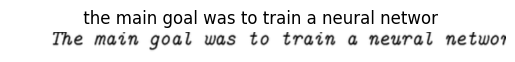

In [6]:
# Load and preprocess images
original_images, images = load_and_preprocess_images(image_paths)

random_ndx = random.randrange(len(images))

# Print some information
print("Number of Images:", images.shape[0])
print("==================================================")

# Define symbols or characters
symbols = " " + string.ascii_lowercase + string.ascii_uppercase + "0123456789.,*&!@~():`^]¢‘;|-«"  # Defining the symbols or characters
print("Number of characters: ", len(symbols))
print("Characters: ", symbols, end="")

Y = np.zeros(shape=(len(outputs), 98, len(symbols)))  # Initializing the Y array with zeros

# Encoding the outputs into one-hot vectors
for example_no, name in enumerate(outputs):
    for letter_no, letter in enumerate(name):
        try:
            Y[example_no][letter_no][symbols.index(letter)] = 1  # Setting the corresponding index to 1 in the one-hot vector
        except:
            print(letter, end=" ")  # Printing the letter if it is not found in the symbols

# Reshape images to add a channel dimension
images = np.reshape(images, (images.shape[0], images.shape[1], images.shape[2], 1))
print("==================================================")
print("==================================================")
print("Shape of images is:", images.shape)

# Display a sample image
plt.imshow(images[random_ndx], cmap='gray')
plt.title(outputs[random_ndx])
plt.axis('off')
plt.show()


 Text:  by light rectangles or by guiding rulers. Tt


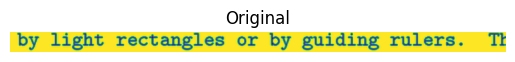

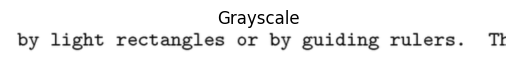


 Text:  smoothing filter that replaces the pixel values with th


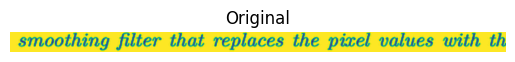

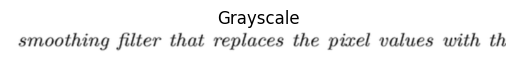


 Text:  is located below the form or they can be printed directly on the f


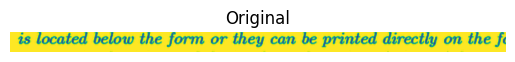

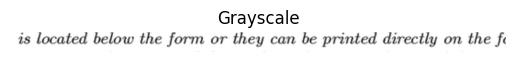

In [7]:
random_ndxes = random.sample(range(len(images)), 3)

counter = 0

for i in random_ndxes:
    print(f"\n Text: {outputs[i]}")
    plt.imshow(original_images[i])
    plt.title("Original")
    plt.axis('off') 
    plt.show()

    plt.imshow(images[i], cmap='gray')
    plt.title("Grayscale")
    plt.axis('off')
    plt.show()

    if (counter < 2):
        print(" ===================================================================")
        counter += 1

In [8]:
def OCRModel():
    # Define input layer for the images
    image = keras.layers.Input((32, 784, 1))

    # Convolutional layers
    conv1 = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(image)
    conv1 = keras.layers.BatchNormalization()(conv1)
    mp1 = keras.layers.MaxPooling2D((2, 2), padding='same')(conv1)

    conv2 = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(mp1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    mp2 = keras.layers.MaxPooling2D((2, 2), padding='same')(conv2)

    conv3 = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(mp2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    mp3 = keras.layers.MaxPooling2D((2, 2), padding='same')(conv3)

    conv4 = keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(mp3)
    conv4 = keras.layers.BatchNormalization()(conv4)
    mp4 = keras.layers.MaxPooling2D((2, 1), padding='same')(conv4)

    conv5 = keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(mp4)
    conv5 = keras.layers.BatchNormalization()(conv5)
    mp5 = keras.layers.MaxPooling2D((2, 1), padding='same')(conv5)

    conv6 = keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(mp5)

    # Batch Normalization layer
    bn = keras.layers.BatchNormalization()(conv6)

    # Wrap the sq tensor in a Lambda layer
    sq = keras.layers.Lambda(lambda x: tf.squeeze(x, axis=1))(bn)

    # Bidirectional LSTM layers
    rn1 = keras.layers.Bidirectional(keras.layers.LSTM(256, return_sequences=True, dropout=0.2))(sq)
    rn2 = keras.layers.Bidirectional(keras.layers.LSTM(256, return_sequences=True, dropout=0.2))(rn1)

    # Expand dimensions to match the shape for convolutional layer
    exd = keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=2))(rn2)

    # Convolutional layer for mapping to output symbols
    mapping = keras.layers.Conv2D(len(symbols), (2, 2), activation='relu', padding='same')(exd)
    mapping = keras.layers.BatchNormalization()(mapping)
    mapping = keras.layers.Lambda(lambda x: tf.squeeze(x, axis=2))(mapping)

    # Softmax activation for probability distribution over output symbols
    mapping = tf.keras.layers.Softmax()(mapping)

    # Create the model with input and output layers
    model = keras.Model(image, mapping)

    # Compile the model with categorical cross-entropy loss and Adam optimizer
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

# Create and print the model summary
ocr_model = OCRModel()
ocr_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 784, 1)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 784, 16)       │        160 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization             │ (None, 32, 784, 16)       │         64 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 392, 16)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 392, 32)       │      4,640 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_1           │ (None, 16, 392, 32)       │        128 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 196, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 196, 64)        │     18,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_2           │ (None, 8, 196, 64)        │        256 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 98, 64)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 98, 128)        │     73,856 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_3           │ (None, 4, 98, 128)        │        512 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 98, 128)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 98, 256)        │    295,168 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_4           │ (None, 2, 98, 256)        │      1,024 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 98, 256)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_5 (Conv2D)               │ (None, 1, 98, 256)        │    590,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_5           │ (None, 1, 98, 256)        │      1,024 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lambda (Lambda)                 │ (None, 98, 256)           │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ bidirectional (Bidirectional)   │ (None, 98, 512)           │  1,050,624 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 98, 512)           │  1,574,912 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lambda_1 (Lambda)               │ (None, 98, 1, 512)        │          

 Total params: 3,779,290 (14.42 MB)

 Trainable params: 3,777,622 (14.41 MB)

 Non-trainable params: 1,668 (6.52 KB)

In [9]:
# Train the model
history = ocr_model.fit(images, Y, epochs=10, validation_split=0.2)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.0402 - loss: 2.3597 - val_accuracy: 0.0000e+00 - val_loss: 15.0708
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.0309 - loss: 2.2527 - val_accuracy: 0.0049 - val_loss: 11.1590
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.0289 - loss: 2.2193 - val_accuracy: 0.0070 - val_loss: 8.2986
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.0567 - loss: 2.1989 - val_accuracy: 0.0105 - val_loss: 6.3626
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.1856 - loss: 2.1982 - val_accuracy: 0.0049 - val_loss: 5.2873
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.5709 - loss: 2.1639 - val_accuracy: 0.0049 - val_loss: 4.6298
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.5630 - loss: 2.1526 - val_accuracy: 0.0049 - val_loss: 4.0483
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.5661 - loss: 2.1254 - val_accuracy: 0.0049 - val

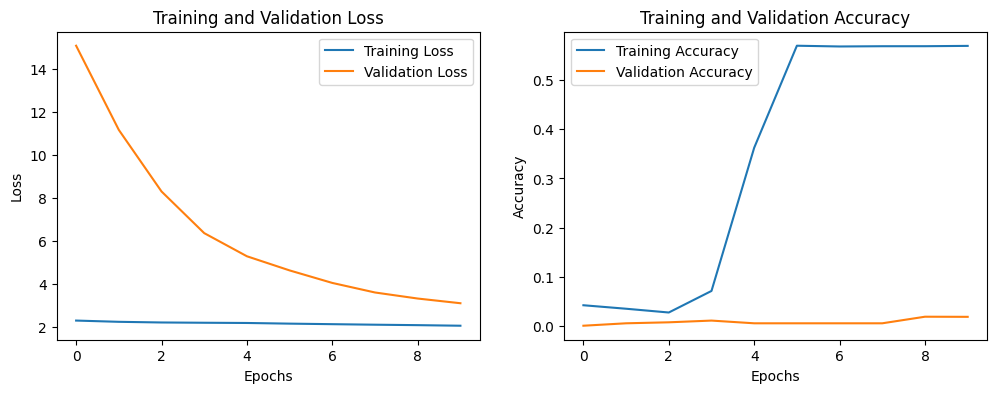

In [10]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 212ms/step
98
Predicted: yypppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppyy
Original:  There exist several methods to design forms with fields to


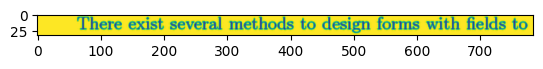

In [11]:
xx = ocr_model.predict(images)  # Perform predictions using the OCR model on input X
index = 100  # Select the index of the sample to analyze
c = ""  # Initialize an empty string to store the predicted output

print(len(xx[0]))  # Print the length of the prediction result

# Iterate over each character in the predicted output
for i in range(len(xx[0])):
    c = c + (symbols[np.argmax(xx[index][i])])  # Get the index of the highest probability and append the corresponding symbol to the output string

# Print the predicted output
print("Predicted:", c.strip())

# Print the original output
print("Original:", outputs[index])

# Display the image at index 100
plt.imshow(images[index][:, :, 0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step

 Original:	 whenever the handwritten text touches the rulers. Nevertheless,
 Predicted:	[[[8.15268699e-03 7.59644853e-03 1.85676627e-02 ... 1.40423272e-02
   1.37536088e-02 1.35705899e-02]
  [3.28560569e-03 3.06143682e-03 2.39223819e-02 ... 1.44998664e-02
   1.44527340e-02 1.38793606e-02]
  [2.85532023e-03 2.66050873e-03 2.47363467e-02 ... 1.45045333e-02
   1.44964289e-02 1.38647882e-02]
  ...
  [3.28652188e-03 3.06229061e-03 2.40616426e-02 ... 1.44534279e-02
   1.44248409e-02 1.38445720e-02]
  [8.01610574e-03 7.46918609e-03 1.94457658e-02 ... 1.37716476e-02
   1.36053115e-02 1.33658228e-02]
  [8.53676870e-02 7.95432553e-02 2.45305819e-05 ... 7.15530405e-05
   6.88757063e-05 7.69483086e-05]]]


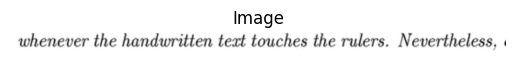


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

 Original:	 pixel neighborhood for each pixel, thereby re
 Predicted:	[[[8.16836115e-03 7.61105306e-03 1.85584202e-02 ... 1.40391393e-02
   1.37516791e-02 1.35681815e-02]
  [3.28770699e-03 3.06339515e-03 2.39206590e-02 ... 1.44997472e-02
   1.44524500e-02 1.38796717e-02]
  [2.85691675e-03 2.66199606e-03 2.47344617e-02 ... 1.45051004e-02
   1.44963469e-02 1.38652911e-02]
  ...
  [3.31252883e-03 3.08652339e-03 2.40184721e-02 ... 1.44500239e-02
   1.44209210e-02 1.38428155e-02]
  [8.53147078e-03 7.94938859e-03 1.90863125e-02 ... 1.36883277e-02
   1.35123497e-02 1.32918647e-02]
  [8.53918344e-02 7.95657560e-02 2.28381359e-05 ... 6.74010371e-05
   6.47926863e-05 7.24696802e-05]]]


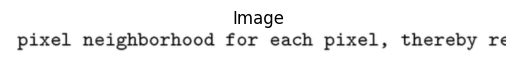


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

 Original:	 eliminating high frequency noise from in
 Predicted:	[[[8.03171005e-03 7.48372637e-03 1.86669081e-02 ... 1.40568074e-02
   1.37708504e-02 1.35804778e-02]
  [3.27944197e-03 3.05569405e-03 2.39355974e-02 ... 1.44997565e-02
   1.44525701e-02 1.38788857e-02]
  [2.85427808e-03 2.65953760e-03 2.47395821e-02 ... 1.45048536e-02
   1.44959902e-02 1.38645787e-02]
  ...
  [3.27657745e-03 3.05302488e-03 2.40790527e-02 ... 1.44539857e-02
   1.44263050e-02 1.38450004e-02]
  [7.93164223e-03 7.39048515e-03 1.95091963e-02 ... 1.37859154e-02
   1.36210173e-02 1.33771189e-02]
  [8.53638202e-02 7.95396492e-02 2.48056476e-05 ... 7.22285986e-05
   6.95340714e-05 7.76706584e-05]]]


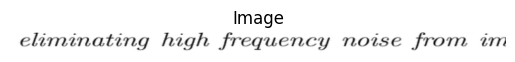

In [12]:
random_ndxes = random.sample(range(len(images)), 3)

counter = 0

for i in random_ndxes:
    print("")
    preprocessed_image = images[i].reshape((1, 32, 784, 1))
    pred_text = ocr_model.predict(preprocessed_image)

    print(f"\n Original:\t{outputs[i]}")
    print(f" Predicted:\t{pred_text}")

    plt.imshow(images[i], cmap='gray')
    plt.title("Image")
    plt.axis('off')
    plt.show()

    if counter < 2:
        print(" ===================================================================")
        counter += 1 



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step

 Original:	 account: The best way to print these light rectangles is in a differs
 Predicted:	yypppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppyy


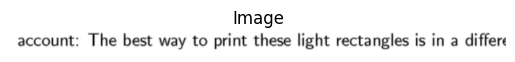


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step

 Original:	 â€˜There are several classic spatial filters
 Predicted:	yypppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppyy


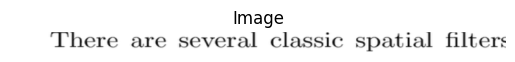


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step

 Original:	 There are several classic spatial filters for reducing or elimin
 Predicted:	yypppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppyy


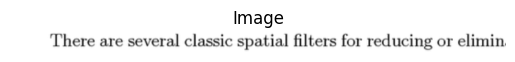

In [13]:
random_ndxes = random.sample(range(len(images)), 3)

counter = 0

for i in random_ndxes:
    print("")
    preprocessed_image = images[i].reshape((1, 32, 784, 1))
    pred_text = ocr_model.predict(preprocessed_image)
    c = ""

    for j in range(len(pred_text[0])):
        char_index = np.argmax(pred_text[0][j])
        confidence = pred_text[0][j][char_index]
        c += symbols[char_index]

    print(f"\n Original:\t{outputs[i]}")
    print(f" Predicted:\t{c.strip()}")
    plt.imshow(images[i], cmap='gray')
    plt.title("Image")
    plt.axis('off')
    plt.show()

    if counter < 2:
        print(" ===================================================================")
        counter += 1
